In [3]:
function naive_multiplication(A, B)
    C = zeros(Float64, size(A, 1), size(B, 2))
    for i=1:size(A, 1)
        for j=1:size(B, 2)
            for k=1:size(A, 2)
                C[i,j]=C[i, j] + A[i, k] * B[k, j] 
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

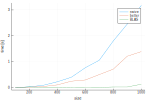

In [8]:
using Plots

x_axis=100:100:1000

y_axis = []
y_axis1 = []
y_axis2 = []

for x in x_axis
    append!(y_axis, @elapsed naive_multiplication(rand(x, x), rand(x, x)))
    append!(y_axis1, @elapsed better_multiplication(rand(x, x), rand(x, x)))
    append!(y_axis2, @elapsed rand(x, x)*rand(x, x))
end
    
plot(x_axis, [y_axis, y_axis1, y_axis2], labels =["naive" "better" "BLAS"], xlabel = "size", ylabel = "time [s]")

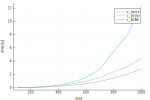

In [6]:
using CSV
using Plots
using DataFrames

data = CSV.read("multiplication.csv", nullable = false)

plot(data[:size], [data[:naive], data[:better], data[:blas]], 
    labels =["c_naive" "c_better" "c_BLAS"], 
    xlabel = "size", 
    ylabel = "time [s]")

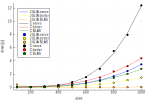

In [7]:
using Polynomials

fit_y = polyfit(x_axis, y_axis, 3)
fit_y1 = polyfit(x_axis, y_axis1, 3)
fit_y2 = polyfit(x_axis, y_axis2, 2)


fit_y_C = polyfit(x_axis, data[:naive], 3)
fit_y1_C = polyfit(x_axis, data[:better], 3)
fit_y2_C = polyfit(x_axis, data[:blas], 2)

#Compile
fit_y(1)
fit_y1(1)
fit_y2(1)
fit_y_C(1)
fit_y1_C(1)
fit_y2_C(1)

plot(x_axis, [polyval(fit_y, x_axis), 
        polyval(fit_y1, x_axis), 
        polyval(fit_y2, x_axis),
        polyval(fit_y_C, x_axis),
        polyval(fit_y1_C, x_axis),
        polyval(fit_y2_C, x_axis)],
    labels = ["JULIA naive" "JULIA better" "JULIA BLAS" "C naive" "C better" "C BLAS"],
    colour = [:blue :yellow :orange :black :red :green],    
    xlabel = "size",
    ylabel = "time [s]", 
    legend = :topleft)


scatter!(x_axis, [y_axis, y_axis1, y_axis2], 
        labels =["JULIA naive" "JULIA better" "JULIA BLAS"],
        colour = [:blue :yellow :orange])


scatter!(data[:size], [data[:naive], data[:better], data[:blas]], 
    labels =["C naive" "C better" "C BLAS"],
    colour = [:black :red :green],
    legend = :topleft)